<a href="https://colab.research.google.com/github/aaril011/Praktikum_PCD/blob/main/UAS_PRAKTIKUM_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rembg
!apt-get install -y libsm6 libxext6 libxrender-dev libgl1-mesa-glx libglib2.0-0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender-dev is already the newest version (1:0.9.10-1build4).
libxrender-dev set to manually installed.
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.3).
libglib2.0-0 set to manually installed.
The following NEW packages will be installed:
  libgl1-mesa-glx
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,584 B of archives.
After this operation, 74.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.c

In [12]:
from rembg import remove
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [13]:
# membaca citra asli
image = cv2.imread('/content/aril.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# Hapus latar belakang dari citra
output_image = remove(image)
# Terapkan median blur pada citra asli
median_filtered = cv2.medianBlur(image, 15)

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 112GB/s]


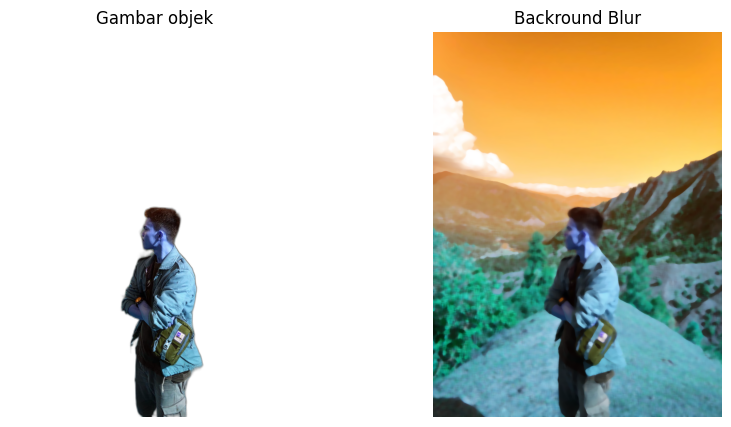

In [6]:
# menampilkan gambar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title( 'Gambar objek' )
plt.imshow(output_image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Backround Blur')
plt.imshow(median_filtered)
plt.axis('off')

plt.show()


In [7]:
# Konversi citra hasil remove ke format RGBA untuk transparansi
output_image_rgba = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGBA)

# Konversi citra hasil remove dan median blur ke format yang sesuai
output_image_rgba = np.array(output_image_rgba)
median_filtered_rgb = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)

In [8]:
# Dapatkan dimensi citra
h1, w1 = median_filtered_rgb.shape[:2]
h2, w2 = output_image_rgba.shape[:2]

# Tentukan ukuran kanvas yang akan digunakan untuk padding
h = max(h1, h2)
w = max(w1, w2)

In [9]:
# Buat kanvas transparan untuk citra dengan latar belakang dihapus
canvas = np.zeros((h, w, 4), dtype=np.uint8)
canvas[:h2, :w2, :] = output_image_rgba

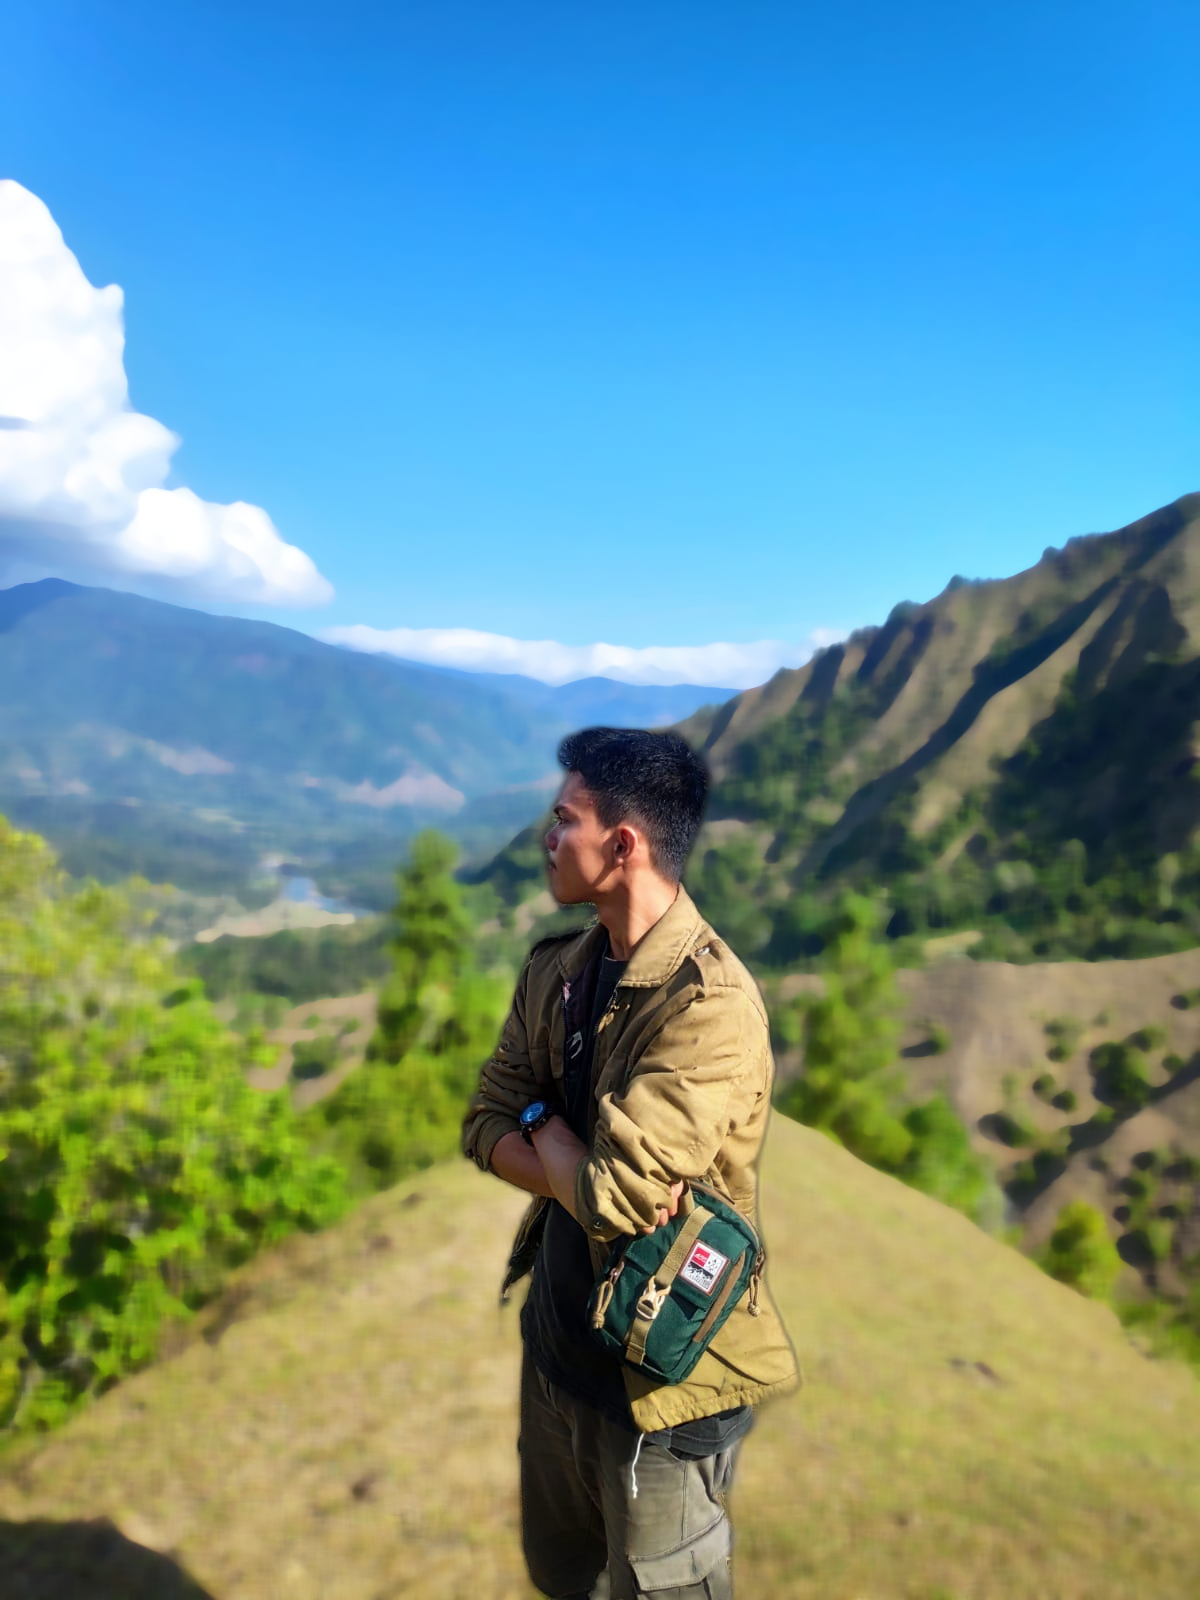

In [10]:
# Gabungkan citra yang sudah dihapus latar belakangnya dengan citra blur menggunakan alpha blending
alpha_mask = canvas[:, :, 3] / 255.0
alpha_inv = 1.0 - alpha_mask

result = np.zeros_like(median_filtered_rgb)
for c in range(0, 3):
    result[:, :, c] = (alpha_mask * canvas[:, :, c] +
                       alpha_inv * median_filtered_rgb[:, :, c])

# Konversi hasil akhir kembali ke format BGR untuk menyimpan menggunakan OpenCV
final_result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

# Tampilkan hasil
cv2_imshow(final_result_bgr)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')